In [1]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import warnings
warnings.filterwarnings('ignore')

In [5]:
df_movies = pd.read_csv("D:\Ankita\Assignments\\my_movies.csv")
print(df_movies.shape)
print(df_movies.info())
df_movies.head(10)

(10, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB
None


,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [6]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [7]:
df_movies2 = df_movies.iloc[:,5:]
df_movies2

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


# Apriori Algorithm with different values for support and confidence¶

In [8]:
# 10% Support and 70% confidence

frequent_itemsets10_70 = apriori(df_movies2, min_support=0.1, use_colnames=True)
frequent_itemsets10_70

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [9]:
rules10_70 = association_rules(frequent_itemsets10_70, metric='lift', min_threshold=0.7)

# Lift Ratio > 1 is a good association rule
rules10_70[rules10_70.lift>1].sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
172,"(LOTR1, Sixth Sense)","(Green Mile, Harry Potter1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
184,"(LOTR2, Sixth Sense)","(Green Mile, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
196,"(LOTR2, Green Mile)","(Harry Potter1, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
187,"(LOTR1, Sixth Sense)","(LOTR2, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
139,"(Gladiator, Green Mile, Sixth Sense)",(LOTR),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
...,...,...,...,...,...,...,...,...,...
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
45,(Sixth Sense),"(Gladiator, Patriot)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
40,"(Gladiator, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
7,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2


Lift Ratio > 1 is a good influential rule in selecting the associated transactions

In [10]:
lift1 = rules10_70[rules10_70.lift>1]
lift1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
6,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
7,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
10,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
245,(Green Mile),"(LOTR2, Harry Potter1, LOTR1, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
246,(Sixth Sense),"(LOTR2, Green Mile, Harry Potter1, LOTR1)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
247,(LOTR2),"(Green Mile, LOTR1, Harry Potter1, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
248,(Harry Potter1),"(LOTR2, Green Mile, LOTR1, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [11]:
matrix1 = lift1.pivot('antecedents','consequents','lift')
matrix1

consequents,(Sixth Sense),"(LOTR2, Green Mile)","(LOTR, Green Mile)","(Braveheart, Gladiator)","(Braveheart, Patriot)","(LOTR2, LOTR1)","(Gladiator, Green Mile, Sixth Sense)",(Harry Potter1),"(LOTR, Green Mile, Sixth Sense)","(Gladiator, LOTR, Sixth Sense)",...,"(Gladiator, LOTR)","(Gladiator, Green Mile)","(LOTR1, Sixth Sense)","(Harry Potter1, Sixth Sense)","(LOTR2, Green Mile, Harry Potter1)","(Harry Potter1, LOTR1)","(LOTR2, Green Mile, Harry Potter1, LOTR1)","(LOTR2, Sixth Sense)","(Patriot, Sixth Sense)","(LOTR2, Green Mile, Harry Potter1, Sixth Sense)"
antecedents,,,,,,,,,,,,,,,,,,,,,
(Gladiator),1.190476,NaN,1.428571,NaN,1.428571,NaN,NaN,NaN,1.428571,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.428571,NaN
"(LOTR, Green Mile)",1.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(Braveheart, Patriot)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(Braveheart, Gladiator)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(LOTR2, LOTR1)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,...,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
"(Gladiator, LOTR, Green Mile)",1.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
(Harry Potter1),NaN,5.000000,NaN,NaN,NaN,2.5,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN
"(Gladiator, LOTR, Sixth Sense)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(LOTR, Green Mile, Sixth Sense)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 0.98, 'my_movies rules [10, 70]')

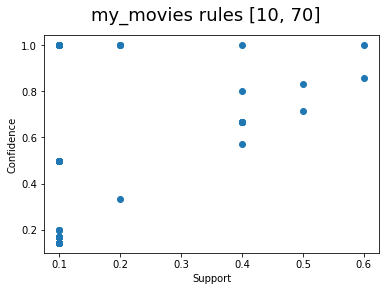

In [12]:
#visualization [10, 70]

plt.scatter(rules10_70['support'], rules10_70['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.suptitle('my_movies rules [10, 70]', size=18)

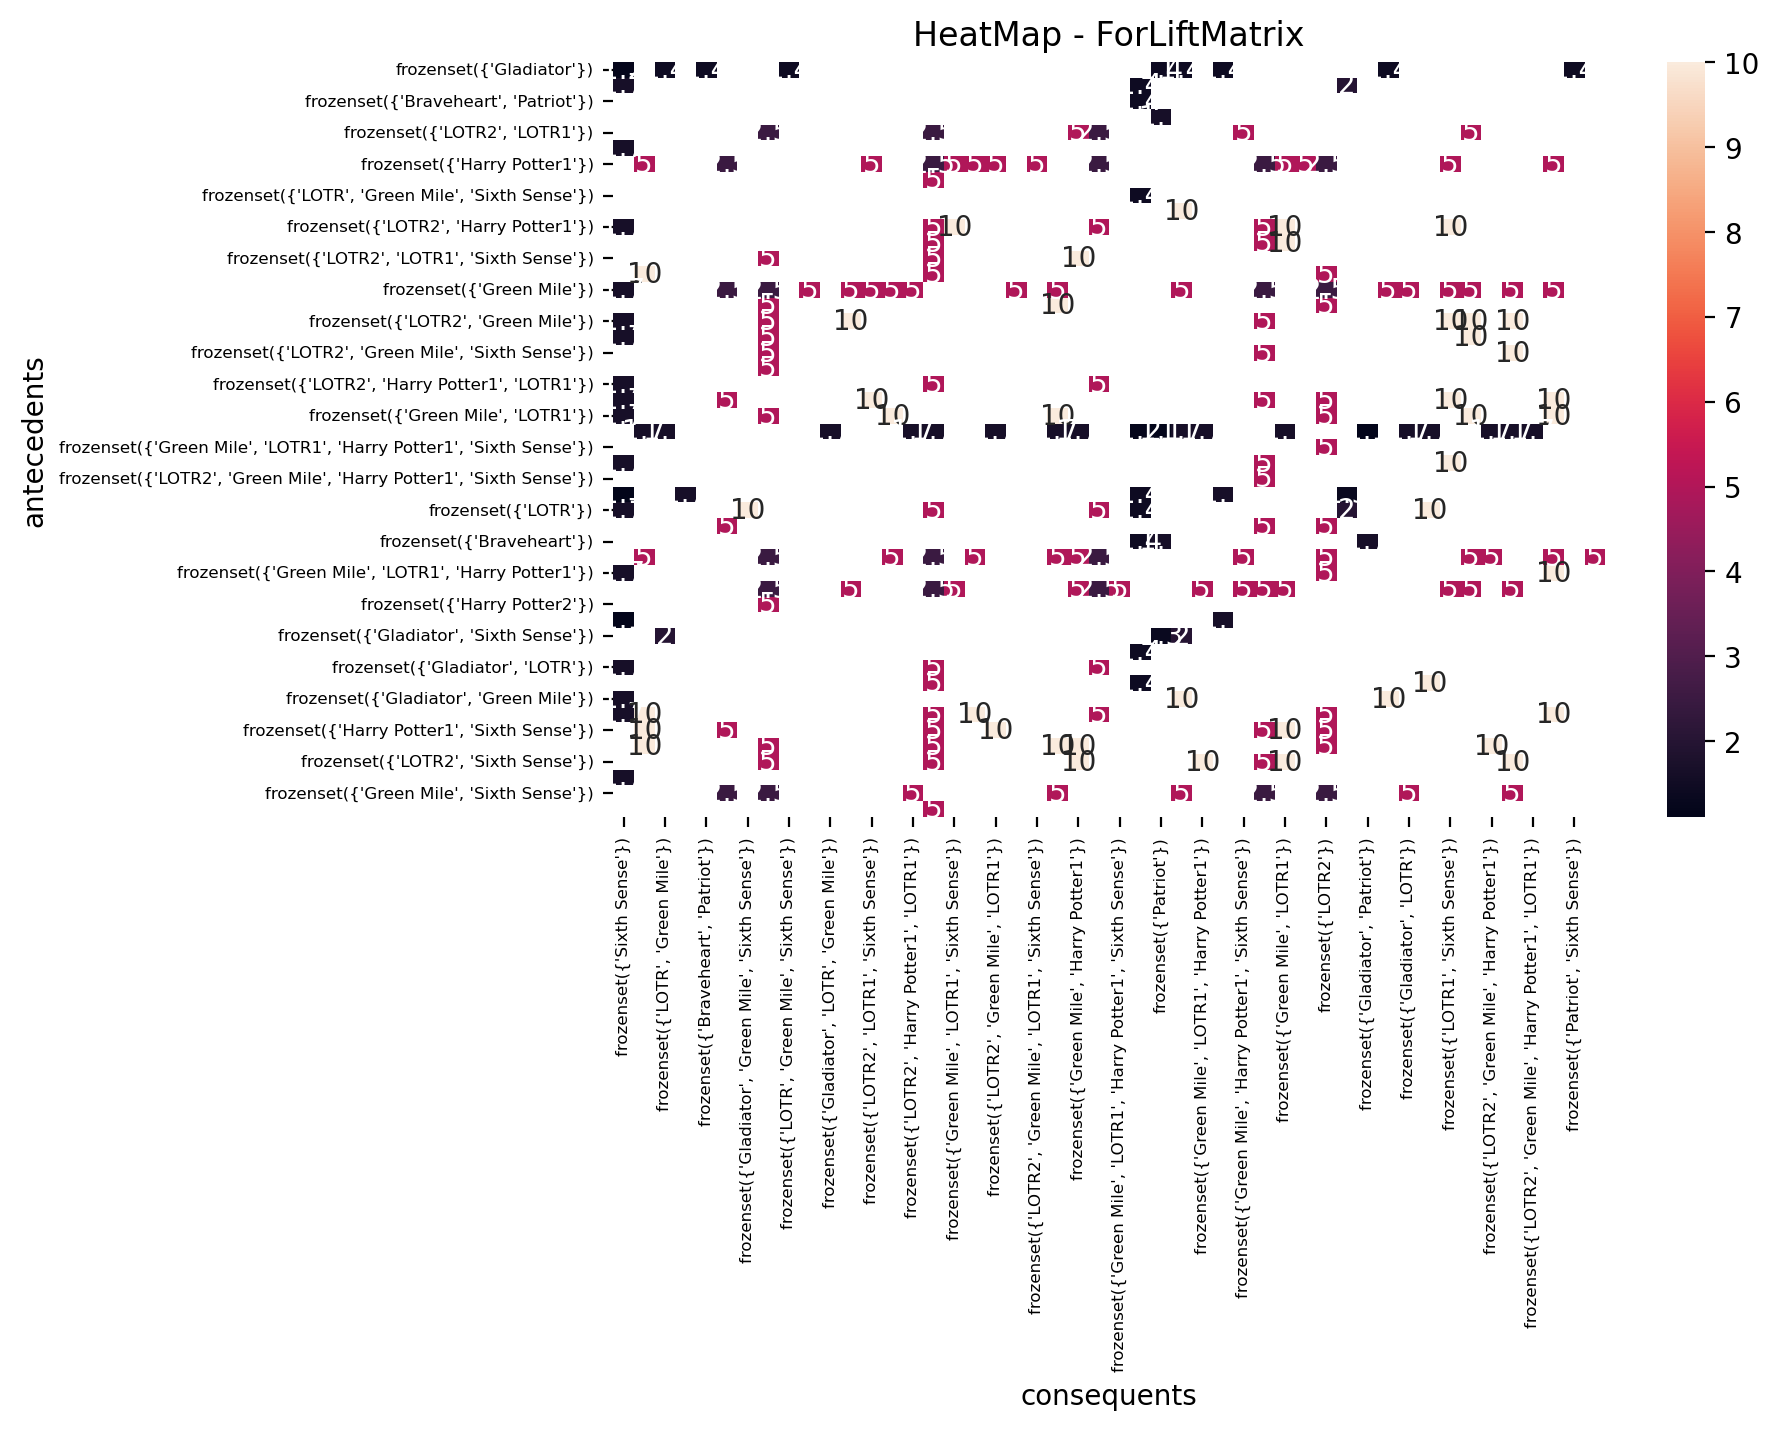

In [13]:
plt.figure(figsize=(8,5), dpi= 200)
sns.heatmap(matrix1, annot=True)
plt.title('HeatMap - ForLiftMatrix')
plt.yticks(rotation=0, fontsize= 6)
plt.xticks(rotation=90, fontsize= 6)
plt.show()

In [14]:
# 20% Support and 60% confidence

frequent_itemsets20_60 = apriori(df_movies2, min_support=0.2, use_colnames=True)
frequent_itemsets20_60

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.2,(Green Mile)
7,0.5,"(Gladiator, Sixth Sense)"
8,0.4,"(Patriot, Sixth Sense)"
9,0.2,"(Green Mile, Sixth Sense)"


In [15]:
rules20_60 = association_rules(frequent_itemsets20_60, metric='lift', min_threshold=0.6)

# Lift Ratio > 1 is a good association rule
rules20_60[rules20_60.lift>1].sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
5,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
7,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
12,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
13,(Gladiator),"(Patriot, Sixth Sense)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
11,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
14,(Patriot),"(Gladiator, Sixth Sense)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5


In [16]:
lift2 = rules20_60[rules10_70.lift>1]
lift2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
7,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
10,"(Gladiator, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
11,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
12,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
13,(Gladiator),"(Patriot, Sixth Sense)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
14,(Patriot),"(Gladiator, Sixth Sense)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5
15,(Sixth Sense),"(Gladiator, Patriot)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2


In [17]:
matrix2 = lift2.pivot('antecedents','consequents','lift')
matrix2

consequents,(Sixth Sense),(Gladiator),(Patriot),"(Patriot, Sixth Sense)","(Gladiator, Sixth Sense)","(Gladiator, Patriot)"
antecedents,,,,,,
(Gladiator),1.190476,NaN,1.428571,1.428571,NaN,NaN
(Sixth Sense),NaN,1.190476,NaN,NaN,NaN,1.111111
(Patriot),NaN,1.428571,NaN,NaN,1.333333,NaN
"(Gladiator, Patriot)",1.111111,NaN,NaN,NaN,NaN,NaN
"(Gladiator, Sixth Sense)",NaN,NaN,1.333333,NaN,NaN,NaN
"(Patriot, Sixth Sense)",NaN,1.428571,NaN,NaN,NaN,NaN


Text(0.5, 0.98, 'my_movies rules [20, 60]')

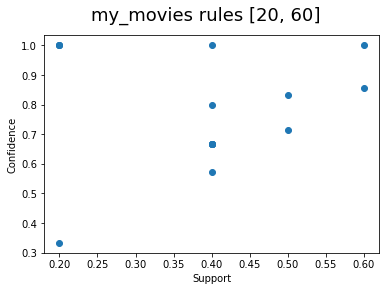

In [18]:
#visualization

plt.scatter(rules20_60['support'], rules20_60['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.suptitle('my_movies rules [20, 60]', size=18)

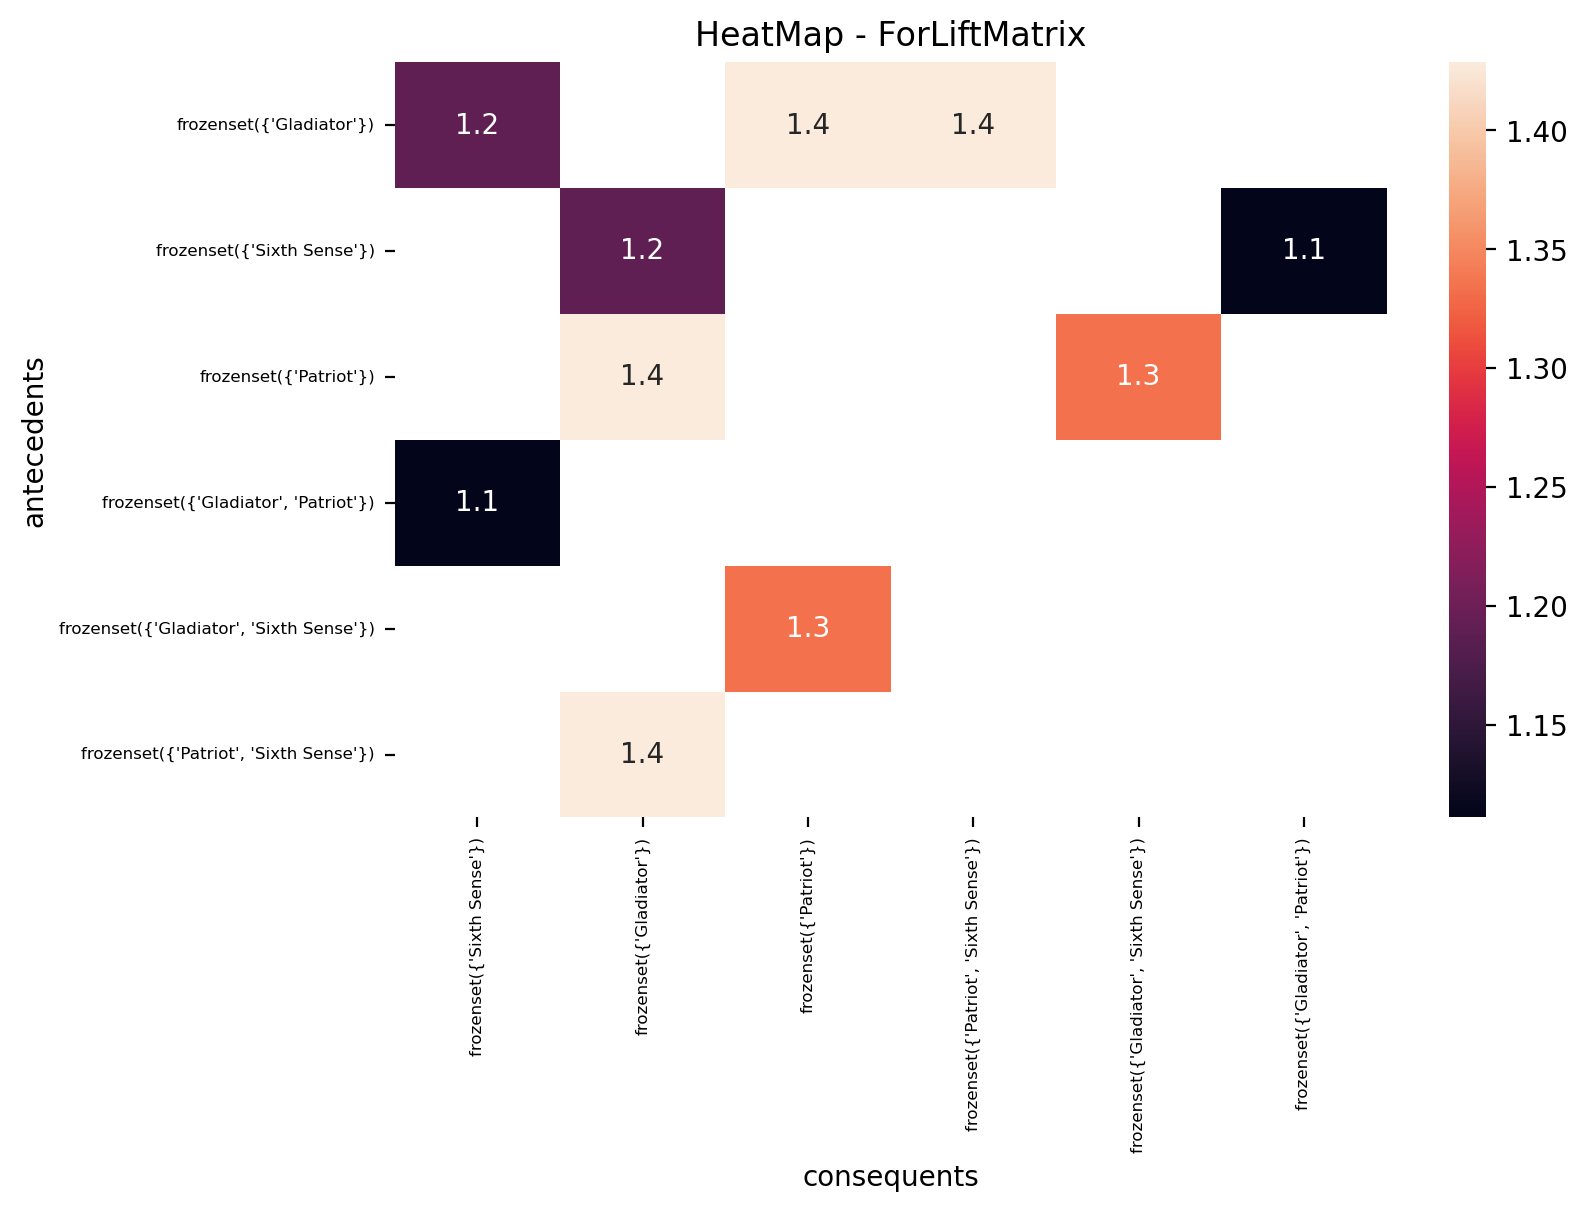

In [20]:
plt.figure(figsize=(8,5), dpi= 200)
sns.heatmap(matrix2, annot=True)
plt.title('HeatMap - ForLiftMatrix')
plt.yticks(rotation=0, fontsize= 6)
plt.xticks(rotation=90, fontsize= 6)
plt.show()

In [21]:
# 10% Support and 50% confidence

frequent_itemsets10_50 = apriori(df_movies2, min_support=0.1, use_colnames=True)
frequent_itemsets10_50

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [23]:
rules10_50 = association_rules(frequent_itemsets10_50, metric='lift', min_threshold=0.5)

# Lift Ratio > 1 is a good association rule
rules10_50[rules10_50.lift>1].sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
172,"(LOTR1, Sixth Sense)","(Green Mile, Harry Potter1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
184,"(LOTR2, Sixth Sense)","(Green Mile, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
196,"(LOTR2, Green Mile)","(Harry Potter1, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
187,"(LOTR1, Sixth Sense)","(LOTR2, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
139,"(Gladiator, Green Mile, Sixth Sense)",(LOTR),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
...,...,...,...,...,...,...,...,...,...
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
45,(Sixth Sense),"(Gladiator, Patriot)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
40,"(Gladiator, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
7,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2


Text(0.5, 0.98, 'my_movies rules [10, 50]')

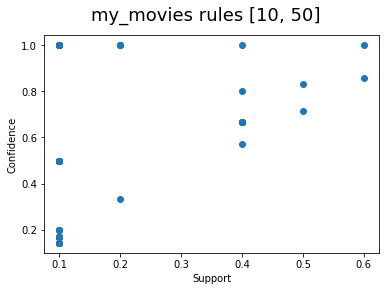

In [24]:
#visualization 10,50

plt.scatter(rules10_50['support'], rules10_50['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.suptitle('my_movies rules [10, 50]', size=18)

**change in K-Itemset/minimum length in apriori algorithm**

In [25]:
# 10% Support and 50% confidence
# K itemset is 2

frequent_itemsets10_50 = apriori(df_movies2, min_support=0.1, use_colnames=True, max_len=2)
frequent_itemsets10_50

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [26]:
rules10_50 = association_rules(frequent_itemsets10_50, metric='lift', min_threshold=0.5)

# Lift Ratio > 1 is a good association rule
rules10_50[rules10_50.lift>1].sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
24,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
25,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
38,(LOTR),(Green Mile),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
31,(Harry Potter2),(Harry Potter1),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
30,(Harry Potter1),(Harry Potter2),0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
39,(Green Mile),(LOTR),0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
27,(LOTR1),(Green Mile),0.2,0.2,0.1,0.500000,2.500000,0.06,1.60
28,(LOTR2),(Harry Potter1),0.2,0.2,0.1,0.500000,2.500000,0.06,1.60
37,(Green Mile),(LOTR2),0.2,0.2,0.1,0.500000,2.500000,0.06,1.60
36,(LOTR2),(Green Mile),0.2,0.2,0.1,0.500000,2.500000,0.06,1.60


Text(0.5, 0.98, 'my_movies rules K=2 [10, 50]')

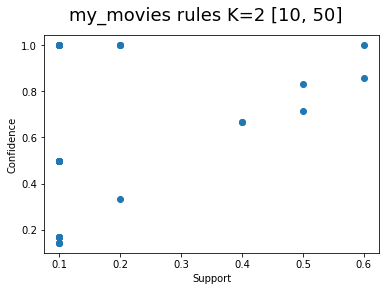

In [27]:
#visualization 10,50

plt.scatter(rules10_50['support'], rules10_50['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.suptitle('my_movies rules K=2 [10, 50]', size=18)